In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
meta_df = pd.read_csv('../train_val_test_sgkf_Feb22.csv', index_col=0)
meta_df

,file,source,category,file_group,fold
0,../data/interim/S2L_LULC/non_urban/s2lam112_21...,nature_S2L_LULC/non_urban,0,../data/interim/S2L_LULC/non_urban/s2lam112_21...,0
1,../data/interim/youtube/NomadicAmbience_city/-...,city_youtube,1,youtube/NomadicAmbience_city/-veiV1hHEbA,1
2,../data/interim/youtube/NomadicAmbience_nature...,nature_youtube/NomadicAmbience_nature,0,youtube/NomadicAmbience_nature/On_o9K0PBAs,1
3,../data/interim/youtube/NomadicAmbience_city/Y...,city_youtube,1,youtube/NomadicAmbience_city/YNAdzvW-ZTc,4
4,../data/interim/youtube/NomadicAmbience_city/7...,city_youtube,1,youtube/NomadicAmbience_city/7dfpryACUV4,7
...,...,...,...,...,...
2477,"../data/interim/GoogleAudioSet/Outside, urban ...",city_GoogleAudioSet,1,"../data/interim/GoogleAudioSet/Outside, urban ...",9
2478,../data/interim/SONYC/audio-10/41_008799.pkl,city_SONYC,1,../data/interim/SONYC/audio-10/41_008799.pkl,6
2479,../data/interim/youtube/NatureSoundscapes/fpPF...,nature_youtube/NatureSoundscapes,0,youtube/NatureSoundscapes/fpPF-uoLaCE,1
2480,../data/interim/S2L_LULC/urban_0_25/s2lam051_2...,nature_S2L_LULC/urban_0_25,0,../data/interim/S2L_LULC/urban_0_25/s2lam051_2...,6


In [3]:
def load_df_pkl(filename, indices):
    import pickle
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df = output[indices]

    # close the file
    file.close()
    return df

df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source']]], axis=1)
df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,category,fold,source
0,5079.0,7.972122e-11,0.01,3.421390,225.195333,73.020601,-29.886797,23.967156,0.032038,0.441153,...,4.101391,4658.427486,0.902509,0.033483,3.237350,22,4.537405,0,0,nature_S2L_LULC/non_urban
1,1368.3,1.883507e-09,0.01,-0.099552,9.884533,73.020597,-12.002075,1.385012,0.251129,0.912988,...,5.161840,13889.757285,0.966824,0.145734,1.372560,19,1.306898,1,1,city_youtube
2,4335.6,1.698732e-10,0.01,0.012187,5.438757,73.020601,-10.778032,1.428861,0.289134,0.942799,...,6.600508,52075.628076,0.993863,0.712873,1.445751,0,0.000000,0,1,nature_youtube/NomadicAmbience_nature
3,2068.9,-3.337860e-10,0.01,0.013607,5.557540,73.020601,-12.742436,1.756315,0.230610,0.940980,...,5.556885,19312.893790,0.981381,0.218160,1.517229,22,1.995202,1,4,city_youtube
4,1429.1,-1.399219e-09,0.01,-0.007568,3.150705,73.020601,-10.822712,0.155157,0.287650,0.988752,...,5.352606,9422.387717,0.980634,0.114797,1.249737,0,0.000000,1,7,city_youtube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,1053.0,2.086163e-10,0.01,-0.152855,43.337766,73.020606,-19.012922,7.595320,0.112035,0.648881,...,4.813981,5543.688706,0.964308,0.081317,2.059258,7,25.181496,1,9,city_GoogleAudioSet
2478,3248.4,2.324581e-09,0.01,0.009969,3.378460,73.020601,-11.058867,0.357686,0.279935,0.983232,...,5.003253,28140.222660,0.921832,0.498663,1.263187,1,0.015700,1,6,city_SONYC
2479,3629.2,-1.203269e-10,0.01,0.018139,3.687584,73.020601,-10.280201,0.474719,0.306189,0.985574,...,6.402525,39967.044953,0.993929,0.511238,1.222785,8,0.693328,0,1,nature_youtube/NatureSoundscapes
2480,1204.0,-1.168251e-09,0.01,-0.058995,3.127339,73.020601,-11.427820,0.333781,0.268293,0.987135,...,4.607388,8026.680635,0.944188,0.068278,1.208853,4,0.612942,0,6,nature_S2L_LULC/urban_0_25


In [4]:
## data preprocessing
def df_preproc(df):

    # replacing the inf values by NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    train_category = df[df['fold']<8]['category']
    val_category = df[df['fold']==8]['category']
    test_category = df[df['fold']==9]['category']

    train_source = df[df['fold']<8]['source']
    val_source = df[df['fold']==8]['source']
    test_source = df[df['fold']==9]['source']

    train_df = df[df['fold']<8].drop(columns=['fold','category','source'])
    val_df = df[df['fold']==8].drop(columns=['fold','category','source'])
    test_df = df[df['fold']==9].drop(columns=['fold','category','source'])

    # replace the nan by mean
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
          ,('scaler', StandardScaler())
    ])

    transformer.fit(train_df)
    train_df = pd.DataFrame(transformer.transform(train_df), columns=train_df.columns)
    val_df = pd.DataFrame(transformer.transform(val_df), columns=val_df.columns)
    test_df = pd.DataFrame(transformer.transform(test_df), columns=test_df.columns)
    
    return train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source


In [5]:
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source = df_preproc(df)

In [6]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


2023-02-22 23:47:28.940424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1220      
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


2023-02-22 23:47:32.704622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 0.5828 - accuracy: 0.7101 - val_loss: 0.4830 - val_accuracy: 0.8085
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8134 - val_loss: 0.4096 - val_accuracy: 0.8340
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8395 - val_loss: 0.3642 - val_accuracy: 0.8681
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8435 - val_loss: 0.3361 - val_accuracy: 0.8766
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8541 - val_loss: 0.3098 - val_accuracy: 0.8851
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8561 - val_loss: 0.2839 - val_accuracy: 0.8851
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8616 - val_loss: 0.2667 - val_accuracy: 0.8936
Epoch 8/20
63/63 [==

In [8]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8458
Loss:  0.48809781670570374
Accuracy:  0.8458498120307922


In [9]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

8/8 [==============================] - 0s 1ms/step


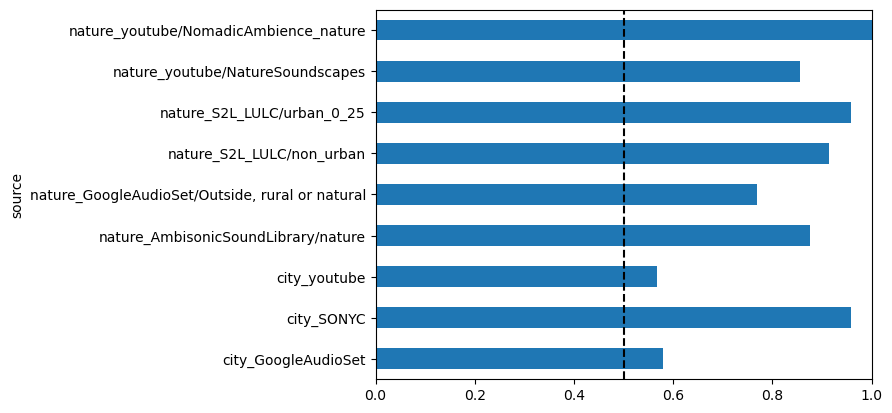

In [10]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Background indices

In [11]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_bg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source = df_preproc(df)

In [12]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1220      
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

Epoch 1/20
63/63 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.7262 - val_loss: 0.4989 - val_accuracy: 0.8213
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8225 - val_loss: 0.4354 - val_accuracy: 0.8468
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8365 - val_loss: 0.3949 - val_accuracy: 0.8511
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8445 - val_loss: 0.3647 - val_accuracy: 0.8383
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8536 - val_loss: 0.3366 - val_accuracy: 0.8553
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8556 - val_loss: 0.3096 - val_accuracy: 0.8553
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8616 - val_loss: 0.3040 - val_accuracy: 0.8638
Epoch 8/20
63/63 [==

In [14]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8379
Loss:  0.377288818359375
Accuracy:  0.8379446864128113


In [15]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

8/8 [==============================] - 0s 1ms/step


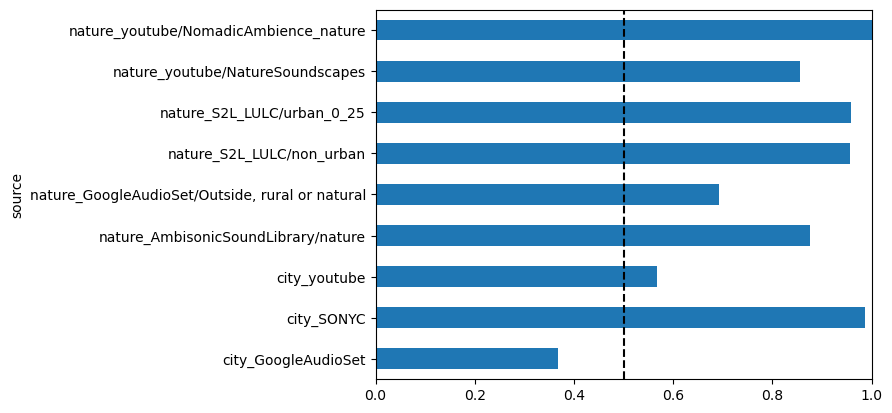

In [16]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Foreground indices

In [17]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_fg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source = df_preproc(df)

In [18]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1220      
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

Epoch 1/20
63/63 [==============================] - 1s 3ms/step - loss: 0.6214 - accuracy: 0.6891 - val_loss: 0.5810 - val_accuracy: 0.7532
Epoch 2/20
63/63 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7793 - val_loss: 0.5155 - val_accuracy: 0.8043
Epoch 3/20
63/63 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8044 - val_loss: 0.4639 - val_accuracy: 0.8340
Epoch 4/20
63/63 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8144 - val_loss: 0.4283 - val_accuracy: 0.8468
Epoch 5/20
63/63 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8245 - val_loss: 0.4001 - val_accuracy: 0.8638
Epoch 6/20
63/63 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8325 - val_loss: 0.3671 - val_accuracy: 0.8723
Epoch 7/20
63/63 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8390 - val_loss: 0.3446 - val_accuracy: 0.8723
Epoch 8/20
63/63 [==

In [20]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8221
Loss:  0.39217543601989746
Accuracy:  0.8221343755722046


In [21]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

8/8 [==============================] - 0s 1ms/step


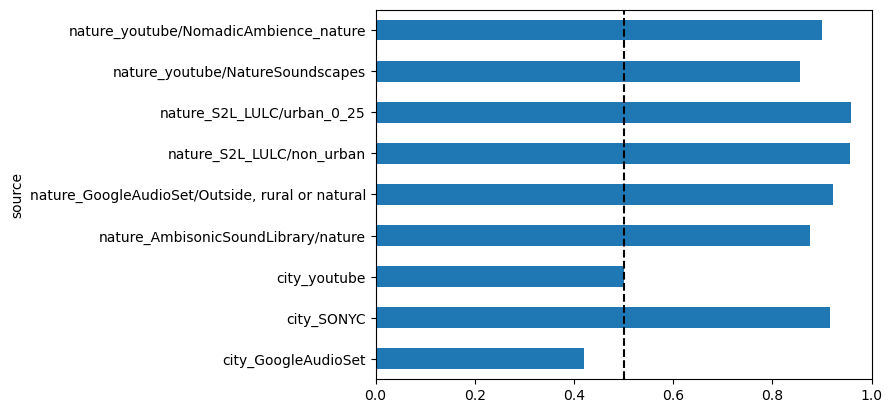

In [22]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()